# 一、基于层次softmax训练词向量
- 本节课采用了基于负采样策略优化模型训练，还有一种层次softmax的优化策略。介绍如何基于层次softmax训练词向量。

## 1.词向量
- 词向量是自然语言里面单词的一种表示方法，即把每个词都表示为一个N维空间内的点。
### one hot representation
- 使用词向量维度大小为整个词汇表的大小，对于每个具体的词汇表中的词，将对应的位置置为1.这种方式表示非常简单，但是存在许多问题，首要问题是，因为词汇表一般都是十分大的，这种表示方法就使得每一个词汇都需要一个超高维度的向量来表示，且由于向量中只含有一个1，信息量太少，表达的效率不高。
### Distributed representation
- 通过训练，将每个词都映射到一个比较短的词向量上来。而训练通常使用神经网络模型。

## 2.CBOW和Skip-gram
- 通过将词汇化为词向量，我们还需要考虑如何让存储的词向量具备语义信息。
- 在自然语言处理领域，使用上下文描述一个词语或者元素的语义是一个常见且有效的办法。经典的word2vec算法就是通过上下文来学习语义信息，包含两个经典模型：CBOW和Skip-gram。
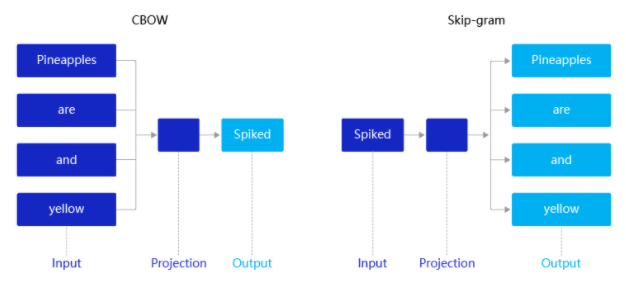
### CBOW
- 通过上下文的词向量推理中心词
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/72397490c0ba499692cff31484431c57bc9d20f7ef344454868e12d628ec5bd3" width="400" ></center>
- 输入层： 一个形状为C×V的one-hot张量，其中C代表上线文中词的个数，通常是一个偶数，我们假设为4；V表示词表大小，我们假设为5000，该张量的每一行都是一个上下文词的one-hot向量表示，比如“Pineapples, are, and, yellow”。
- 隐藏层： 一个形状为V×N的参数张量W1，一般称为word-embedding，N表示每个词的词向量长度，我们假设为128。输入张量和word embedding W1进行矩阵乘法，就会得到一个形状为C×N的张量。综合考虑上下文中所有词的信息去推理中心词，因此将上下文中C个词相加得一个1×N的向量，是整个上下文的一个隐含表示。
- 输出层： 创建另一个形状为N×V的参数张量，将隐藏层得到的1×N的向量乘以该N×V的参数张量，得到了一个形状为1×V的向量。最终，1×V的向量代表了使用上下文去推理中心词，每个候选词的打分，再经过softmax函数的归一化，即得到了对中心词的推理概率：
$$𝑠𝑜𝑓𝑡𝑚𝑎𝑥({O_i})= \frac{exp({O_i})}{\sum_jexp({O_j})}$$
### Skip-gram
- 通过中心词推理上下文
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/a572953b845d4c91bdf6b7b475e7b4437bee69bd60024eb2b8c46f56adf2bdef" width="400" ></center>
- Input Layer（输入层）：接收一个one-hot张量 $V \in R^{1 \times \text{vocab\_size}}$ 作为网络的输入，里面存储着当前句子中心词的one-hot表示。
- Hidden Layer（隐藏层）：将张量$V$乘以一个word embedding张量$W_1 \in R^{\text{vocab\_size} \times \text{embed\_size}}$，并把结果作为隐藏层的输出，得到一个形状为$R^{1 \times \text{embed\_size}}$的张量，里面存储着当前句子中心词的词向量。
- Output Layer（输出层）：将隐藏层的结果乘以另一个word embedding张量$W_2 \in R^{\text{embed\_size} \times \text{vocab\_size}}$，得到一个形状为$R^{1 \times \text{vocab\_size}}$的张量。这个张量经过softmax变换后，就得到了使用当前中心词对上下文的预测结果。根据这个softmax的结果，我们就可以去训练词向量模型。

## 3.基于Hierarchical Softmax的模型
### 1.概述
- 传统的神经网络词向量模型有三层，输入层，隐含层和输出层，而其中由于softmax层的计算量很大，且计算后还需要寻找其中输出的最大值，因此word2vec对模型进行了改进。
- 1、首先，从输入层到隐含层没有采取神经网络的线性变化加激活函数的办法，而是之间采用取平均值的方法，这样，输入的多个词向量在求取平均之后就回2变成单个的词向量。
- 2、为了避免softmax层的大量计算，word2vec采用了霍夫曼数来代替隐含层到输出层的映射。

### 2.基于Hierarchical Softmax的CBOW模型
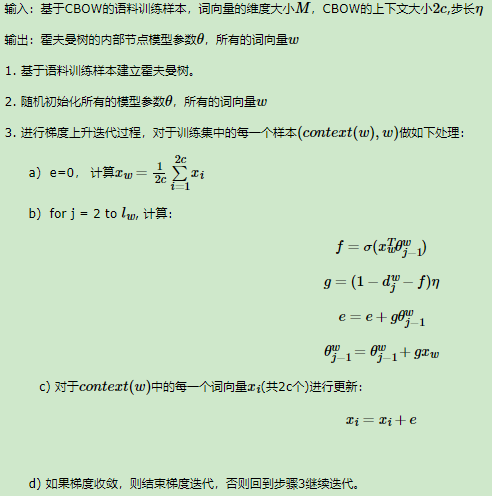

### 3.基于Hierarchical Softmax的Skip-Gram模型
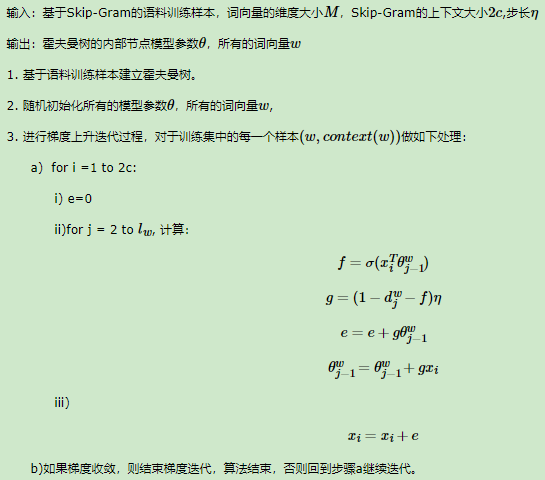

# 二、LSTM可以实现的NLP任务
- 可参考设计模式：序列到类别，同步的序列到序列，异步的序列到序列
- 针对每一种设计模式，请至少给出一种相应的NLP任务模型设计结构图

**NLP任务大体可以分为两类：一种是文本序列到文本序列，比如机器翻译，文本风格迁移；另一种是序列到类别，比如情感分类，实体命名识别，主题分类等。**
## 1.序列到类别-情感分类
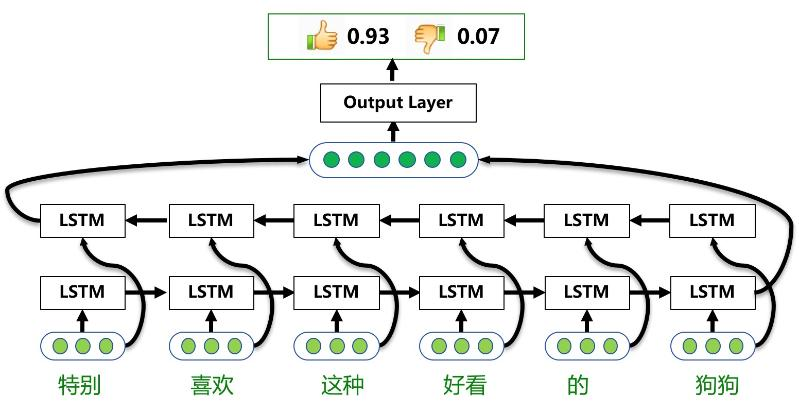
## 2.同步的序列到序列-序列标注
- 同步的序列到序列模式主要用于序列标注任务，即每一时刻都有输入和输出，输入序列和输出序列的长度相同。比如词性标注（Pos Tagging），每个单词都需要标注它的词性。命名实体识别（Name Entity Recognition，NER）也可以看做是序列标注问题，与词性标注的做法类似，特点在于对于命名实体，输出它的命名实体标签来代替词性。
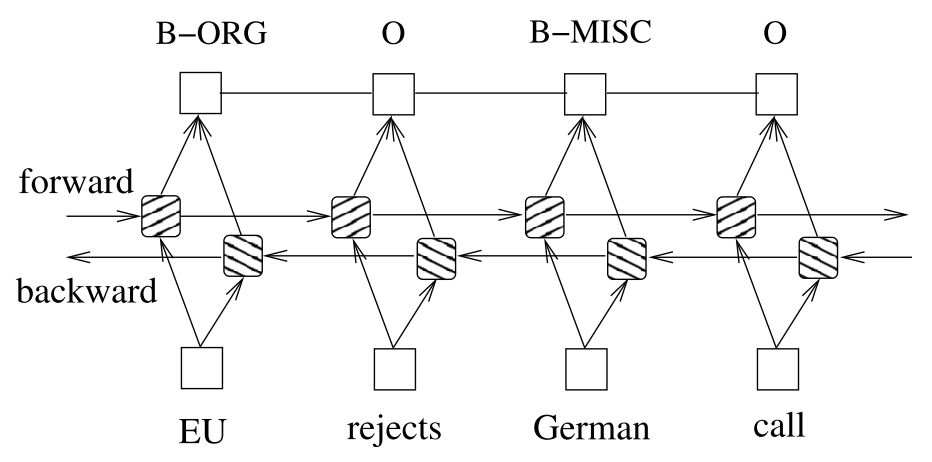

## 3.异步的序列到序列-机器翻译
- 异步的序列到序列模式也称为编码器-解码器（Encoder-Decoder）模型，即输入序列和输出序列不需要有严格的对应关系，也不用保持相同的长度。比如机器翻译中，输入为源语言的单词序列，输出为目标语言的单词序列。
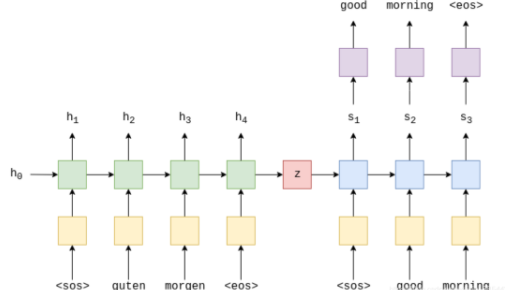

# 三、词向量训练算法拓展
- 本节使用了Skip-Gram的方式训练词向量，请尝试使用CBOW方式训练词向量。

- CBOW网路模型如下图所示：
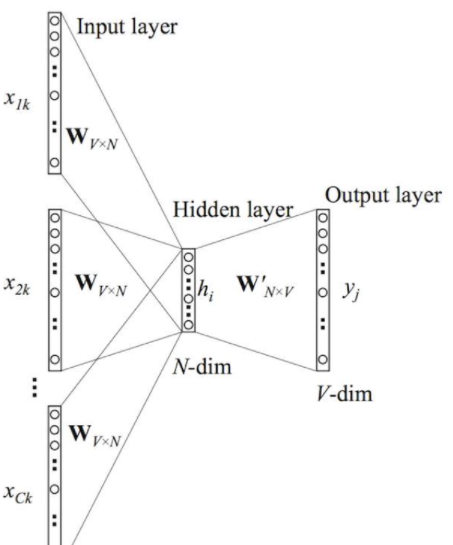

## 1，算法流程
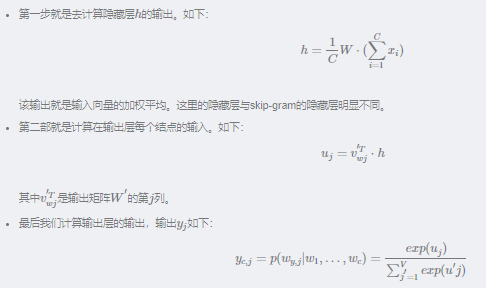

## 2，通过BP算法及随机梯度下降来学习权重
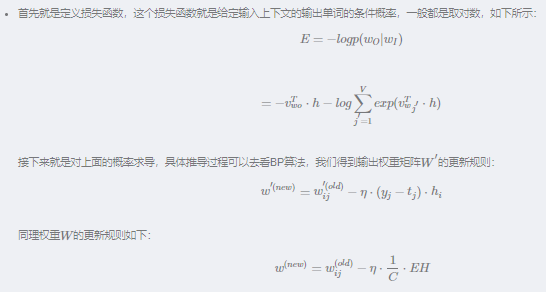

# 四、LSTM算法拓展
- 基于本节课学到的知识，设计实验训练一个语言模型，并尝试用于下一个词预测(next Word Prediction）任务。
- 可选网络结构：RNN,LSTM,GRU
- 构造一份下一个词预测数据集，用于验证语言模型好坏。

## 1，数据说明
- 使用Penn Treebank （PTB）（经Tomas Mikolov预处理过的版本）数据集。PTB数据集较小，训练速度快，应用于Mikolov的公开语言模型训练工具[2]中。其统计情况如下：
- 训练数据	ptb.train.txt   42068句
- 验证数据	ptb.valid.txt   3370句
- 测试数据   ptb.test.txt    3761句

In [ ]:
import paddle
import paddle.fluid as fluid
import six
import numpy
import math

In [ ]:
EMBED_SIZE = 32      # embedding维度
HIDDEN_SIZE = 256    # 隐层大小
N = 5                # ngram大小，这里固定取5
BATCH_SIZE = 100     # batch大小
PASS_NUM = 100       # 训练轮数
use_cuda = False  # 如果用GPU训练，则设置为True
word_dict = paddle.dataset.imikolov.build_dict()
dict_size = len(word_dict)

### 网络结构
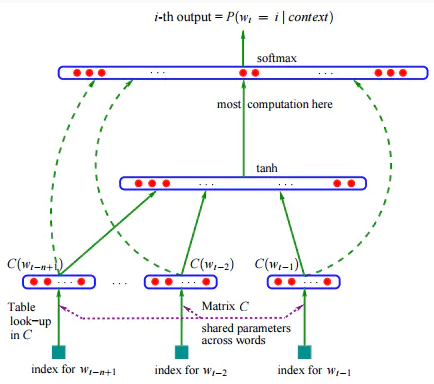

In [ ]:
#我们来定义我们的 N-gram 神经网络结构。这个结构在训练和预测中都会使用到。因为词向量比较稀疏，我们传入参数 is_sparse == True, 可以加速稀疏矩阵的更新。
def inference_program(words, is_sparse):

    embed_first = fluid.embedding(
        input=words[0],
        size=[dict_size, EMBED_SIZE],
        dtype='float32',
        is_sparse=is_sparse,
        param_attr='shared_w')
    embed_second = fluid.embedding(
        input=words[1],
        size=[dict_size, EMBED_SIZE],
        dtype='float32',
        is_sparse=is_sparse,
        param_attr='shared_w')
    embed_third = fluid.embedding(
        input=words[2],
        size=[dict_size, EMBED_SIZE],
        dtype='float32',
        is_sparse=is_sparse,
        param_attr='shared_w')
    embed_fourth = fluid.embedding(
        input=words[3],
        size=[dict_size, EMBED_SIZE],
        dtype='float32',
        is_sparse=is_sparse,
        param_attr='shared_w')

    concat_embed = fluid.layers.concat(
        input=[embed_first, embed_second, embed_third, embed_fourth], axis=1)
    hidden1 = fluid.layers.fc(input=concat_embed,
                              size=HIDDEN_SIZE,
                              act='sigmoid')
    predict_word = fluid.layers.fc(input=hidden1, size=dict_size, act='softmax')
    return predict_word


In [ ]:
def train_program(predict_word):
    # 'next_word'的定义必须要在inference_program的声明之后，
    # 否则train program输入数据的顺序就变成了[next_word, firstw, secondw,
    # thirdw, fourthw], 这是不正确的.
    next_word = fluid.data(name='nextw', shape=[None, 1], dtype='int64')
    cost = fluid.layers.cross_entropy(input=predict_word, label=next_word)
    avg_cost = fluid.layers.mean(cost)
    return avg_cost

def optimizer_func():
    return fluid.optimizer.AdagradOptimizer(
        learning_rate=3e-3,
        regularization=fluid.regularizer.L2DecayRegularizer(8e-4))

In [ ]:
def train(if_use_cuda, params_dirname, is_sparse=True):
    place = fluid.CUDAPlace(0) if if_use_cuda else fluid.CPUPlace()

    train_reader = paddle.batch(
        paddle.dataset.imikolov.train(word_dict, N), BATCH_SIZE)
    test_reader = paddle.batch(
        paddle.dataset.imikolov.test(word_dict, N), BATCH_SIZE)

    first_word = fluid.data(name='firstw', shape=[None, 1], dtype='int64')
    second_word = fluid.data(name='secondw', shape=[None, 1], dtype='int64')
    third_word = fluid.data(name='thirdw', shape=[None, 1], dtype='int64')
    forth_word = fluid.data(name='fourthw', shape=[None, 1], dtype='int64')
    next_word = fluid.data(name='nextw', shape=[None, 1], dtype='int64')

    word_list = [first_word, second_word, third_word, forth_word, next_word]
    feed_order = ['firstw', 'secondw', 'thirdw', 'fourthw', 'nextw']

    main_program = fluid.default_main_program()
    star_program = fluid.default_startup_program()

    predict_word = inference_program(word_list, is_sparse)
    avg_cost = train_program(predict_word)
    test_program = main_program.clone(for_test=True)

    optimizer = optimizer_func()
    optimizer.minimize(avg_cost)

    exe = fluid.Executor(place)

    def train_test(program, reader):
        count = 0
        feed_var_list = [
            program.global_block().var(var_name) for var_name in feed_order
        ]
        feeder_test = fluid.DataFeeder(feed_list=feed_var_list, place=place)
        test_exe = fluid.Executor(place)
        accumulated = len([avg_cost]) * [0]
        for test_data in reader():
            avg_cost_np = test_exe.run(
                program=program,
                feed=feeder_test.feed(test_data),
                fetch_list=[avg_cost])
            accumulated = [
                x[0] + x[1][0] for x in zip(accumulated, avg_cost_np)
            ]
            count += 1
        return [x / count for x in accumulated]

    def train_loop():
        step = 0
        feed_var_list_loop = [
            main_program.global_block().var(var_name) for var_name in feed_order
        ]
        feeder = fluid.DataFeeder(feed_list=feed_var_list_loop, place=place)
        exe.run(star_program)
        for pass_id in range(PASS_NUM):
            for data in train_reader():
                avg_cost_np = exe.run(
                    main_program, feed=feeder.feed(data), fetch_list=[avg_cost])

                if step % 10 == 0:
                    outs = train_test(test_program, test_reader)

                    print("Step %d: Average Cost %f" % (step, outs[0]))

                    # 整个训练过程要花费几个小时，如果平均损失低于5.8，
                    # 我们就认为模型已经达到很好的效果可以停止训练了。
                    # 注意5.8是一个相对较高的值，为了获取更好的模型，可以将
                    # 这里的阈值设为3.5，但训练时间也会更长。
                    if outs[0] < 5.8:
                        if params_dirname is not None:
                            fluid.io.save_inference_model(params_dirname, [
                                'firstw', 'secondw', 'thirdw', 'fourthw'
                            ], [predict_word], exe)
                        return
                step += 1
                if math.isnan(float(avg_cost_np[0])):
                    sys.exit("got NaN loss, training failed.")

        raise AssertionError("Cost is too large {0:2.2}".format(avg_cost_np[0]))

    train_loop()

In [ ]:
def infer(use_cuda, params_dirname=None):
    place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace()

    exe = fluid.Executor(place)

    inference_scope = fluid.core.Scope()
    with fluid.scope_guard(inference_scope):
        # 使用fluid.io.load_inference_model获取inference program，
        # feed变量的名称feed_target_names和从scope中fetch的对象fetch_targets
        [inferencer, feed_target_names,
         fetch_targets] = fluid.io.load_inference_model(params_dirname, exe)

        # 设置输入，用四个LoDTensor来表示4个词语。这里每个词都是一个id，
        # 用来查询embedding表获取对应的词向量，因此其形状大小是[1]。
        # recursive_sequence_lengths设置的是基于长度的LoD，因此都应该设为[[1]]
        # 注意recursive_sequence_lengths是列表的列表
        data1 = numpy.asarray([[211]], dtype=numpy.int64)  # 'among'
        data2 = numpy.asarray([[6]], dtype=numpy.int64)  # 'a'
        data3 = numpy.asarray([[96]], dtype=numpy.int64)  # 'group'
        data4 = numpy.asarray([[4]], dtype=numpy.int64)  # 'of'
        lod = numpy.asarray([[1]], dtype=numpy.int64)

        first_word = fluid.create_lod_tensor(data1, lod, place)
        second_word = fluid.create_lod_tensor(data2, lod, place)
        third_word = fluid.create_lod_tensor(data3, lod, place)
        fourth_word = fluid.create_lod_tensor(data4, lod, place)

        assert feed_target_names[0] == 'firstw'
        assert feed_target_names[1] == 'secondw'
        assert feed_target_names[2] == 'thirdw'
        assert feed_target_names[3] == 'fourthw'

        # 构造feed词典 {feed_target_name: feed_target_data}
        # 预测结果包含在results之中
        results = exe.run(
            inferencer,
            feed={
                feed_target_names[0]: first_word,
                feed_target_names[1]: second_word,
                feed_target_names[2]: third_word,
                feed_target_names[3]: fourth_word
            },
            fetch_list=fetch_targets,
            return_numpy=False)

        print(numpy.array(results[0]))
        most_possible_word_index = numpy.argmax(results[0])
        print(most_possible_word_index)
        print([
            key for key, value in six.iteritems(word_dict)
            if value == most_possible_word_index
        ][0])

In [ ]:
def main(use_cuda, is_sparse):
    if use_cuda and not fluid.core.is_compiled_with_cuda():
        return

    params_dirname = "word2vec.inference.model"

    train(
        if_use_cuda=use_cuda,
        params_dirname=params_dirname,
        is_sparse=is_sparse)

    infer(use_cuda=use_cuda, params_dirname=params_dirname)


main(use_cuda=use_cuda, is_sparse=True)

Step 0: Average Cost 7.337213

Step 10: Average Cost 6.136128

Step 20: Average Cost 5.766995

...

[[0.03768077 0.03463154 0.00018074 ... 0.00022283 0.00029888 0.02967956]]

0

the

- 由于词向量矩阵本身比较稀疏，训练的过程如果要达到一定的精度耗时会比较长。为了能简单看到效果，教程只设置了经过很少的训练就结束并得到如下的预测。我们的模型预测 among a group of 的下一个词是the。这比较符合文法规律。如果我们训练时间更长，比如几个小时，那么我们会得到的下一个预测是 workers。其中第一行表示预测词在词典上的概率分布，第二行表示概率最大的词对应的id，第三行表示概率最大的词。

# 五、模型拓展
- 在以下两个模型中随机选择一个进行剖析，并清晰条理地给出模型原理解读报告。
- FastText:一个词向量计算和文本分类模型
- TextCNN:一个基于卷积的文本分类模型

## 1，FastText
- FastText是Facebook于2016年开源的一个词向量计算和文本分类工具，在学术上并没有太大创新。但是它的优点也非常明显，在文本分类任务中，fastText（浅层网络）往往能取得和深度网络相媲美的精度，却在训练时间上比深度网络快许多数量级。在标准的多核CPU上， 能够训练10亿词级别语料库的词向量在10分钟之内，能够分类有着30万多类别的50多万句子在1分钟之内。

### 字符级别的n-gram
- word2vec把语料库中的每个单词当成原子的，它会为每个单词生成一个向量。这忽略了单词内部的形态特征，比如：“apple” 和“apples”，“达观数据”和“达观”，这两个例子中，两个单词都有较多公共字符，即它们的内部形态类似，但是在传统的word2vec中，这种单词内部形态信息因为它们被转换成不同的id丢失了。
- 为了克服这个问题，fastText使用了字符级别的n-grams来表示一个单词。对于单词“apple”，假设n的取值为3，则它的trigram有
$$“<ap”, “app”, “ppl”, “ple”, “le>”$$
- 其中，<表示前缀，>表示后缀。于是，我们可以用这些trigram来表示“apple”这个单词，进一步，我们可以用这5个trigram的向量叠加来表示“apple”的词向量。

这带来两点好处：

- 1. 对于低频词生成的词向量效果会更好。因为它们的n-gram可以和其它词共享。
- 2. 对于训练词库之外的单词，仍然可以构建它们的词向量。我们可以叠加它们的字符级n-gram向量。

### 模型架构
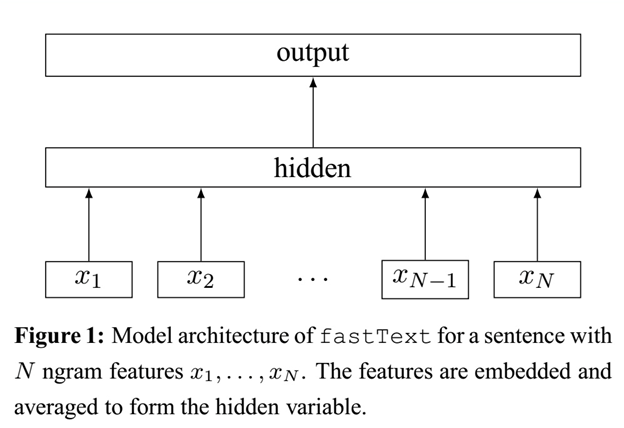
- 可以看到，和CBOW一样，fastText模型也只有三层：输入层、隐含层、输出层（Hierarchical Softmax），输入都是多个经向量表示的单词，输出都是一个特定的target，隐含层都是对多个词向量的叠加平均。不同的是，CBOW的输入是目标单词的上下文，fastText的输入是多个单词及其n-gram特征，这些特征用来表示单个文档；CBOW的输入单词被onehot编码过，fastText的输入特征是被embedding过；CBOW的输出是目标词汇，fastText的输出是文档对应的类标。

### 核心思想
- 模型的后半部分，即从隐含层输出到输出层输出，会发现它就是一个softmax线性多类别分类器，分类器的输入是一个用来表征当前文档的向量；模型的前半部分，即从输入层输入到隐含层输出部分，主要在做一件事情：生成用来表征文档的向量。那么它是如何做的呢？叠加构成这篇文档的所有词及n-gram的词向量，然后取平均。叠加词向量背后的思想就是传统的词袋法，即将文档看成一个由词构成的集合。
- fastText的核心思想就是：将整篇文档的词及n-gram向量叠加平均得到文档向量，然后使用文档向量做softmax多分类。这中间涉及到两个技巧：字符级n-gram特征的引入以及分层Softmax分类。

## 2，TextCNN
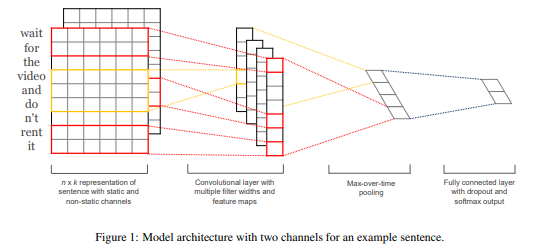